In [1]:
# %matplotlib inline

import numpy as np
import time
import scipy
import matplotlib.pyplot as plt
# from matplotlib import cm

#The following hack is for importing a module from the "Modules" folder
import os
cwd = os.getcwd()
os.chdir('..')
from Modules.analysis import FTX, IFTX
os.chdir(cwd)

from scipy.constants import pi

In [2]:
#Change size of plots
plt.rcParams['figure.figsize'] = [20, 5]

In [3]:
def noise(N, a=0):
    #Output a noise sequence with spectrum 1/f^a
    beta = a-2
    Nr = int(N/2)+1 #number of frequencies for single sided spectrum
    Ck = np.zeros(Nr)
    Ck[1:] = np.sqrt(f[1:]**beta)
    
    phik = 2*pi*np.random.random(Nr)
    Ck = Ck*np.exp(1j*phik)

    noise = np.fft.irfft(Ck)
    return noise

In [4]:
def avar(x, dt, tau=1):
    #Overlapped Allan variance (from phase deviations x(t))
    N = np.size(x)
    m = int(tau/dt)
    s = (1/2/(N-2*m)/tau**2) * np.sum((x[2*m:] - 2*x[m:-m] + x[:-2*m])**2)
    return s 

In [5]:
N = 1024*10
f0 = 1
dt = 1/(4*f0)
T = N*dt
t = np.arange(0,T,dt)

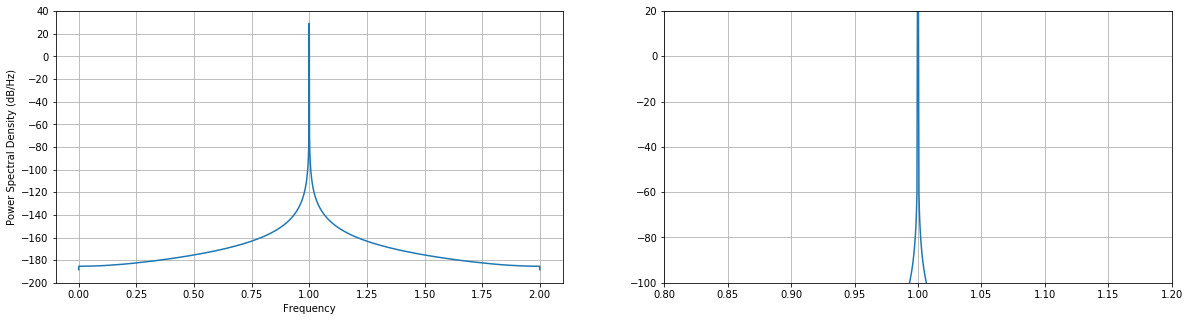

In [6]:
#Clean signal
a = np.cos(2*pi*f0*t)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
A, f = ax1.psd(a, NFFT=N, Fs=1/dt, pad_to=N);
ax2.plot(f,10*np.log10(A));
plt.axis([0.8,1.2,-100,20]); plt.grid('on')

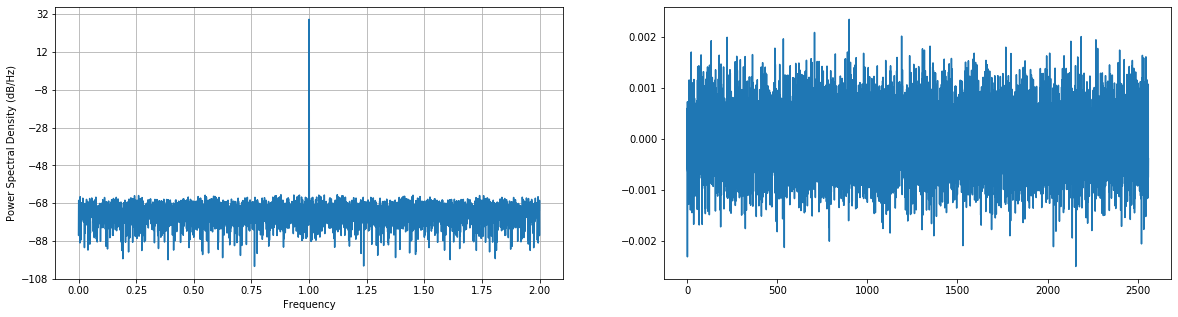

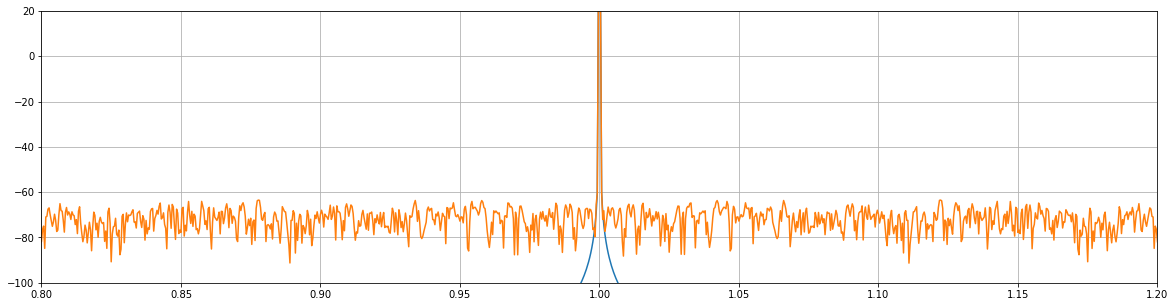

In [7]:
#White phase noise (alpha=2)
phi_noise = 0.06*noise(N, a=2)
PHASE = 2*pi*f0*t + phi_noise
b = np.cos(PHASE)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
B, f = ax1.psd(b, NFFT=N, Fs=1/dt, pad_to=N);
ax2.plot(t,phi_noise)

fig = plt.figure()
plt.plot(f,10*np.log10(A),f,10*np.log10(B));
plt.axis([0.8,1.2,-100,20]); plt.grid('on')

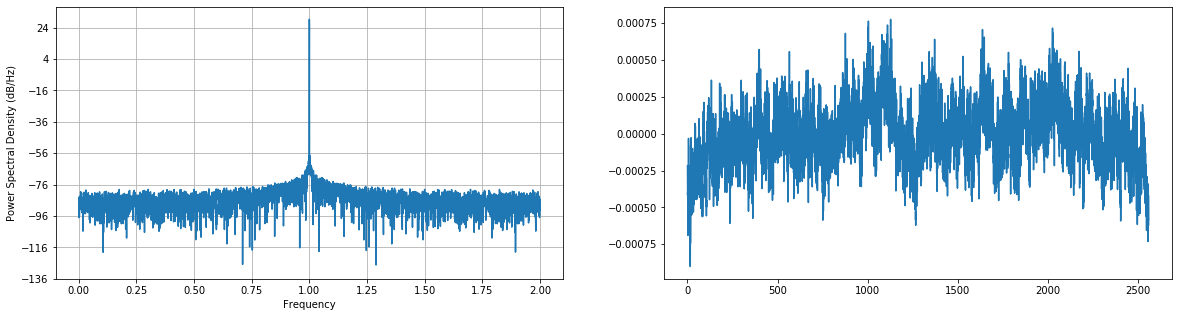

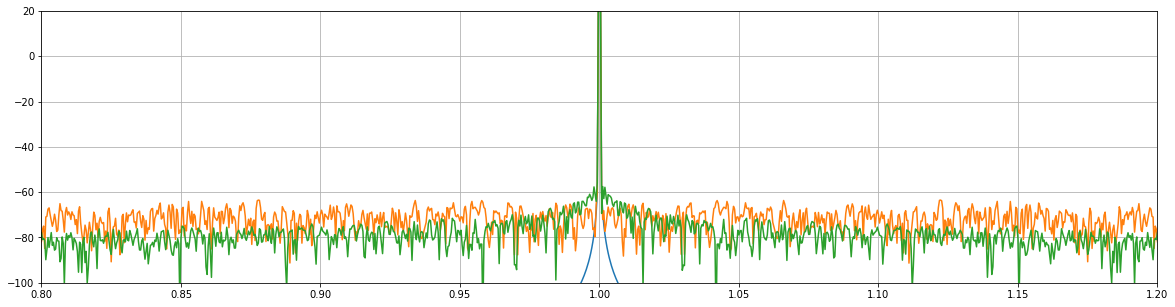

In [8]:
#Flicker phase noise (alpha=1)
phi_noise = 0.01*noise(N, a=1)
PHASE = 2*pi*f0*t + phi_noise
c = np.cos(PHASE)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
C, f = ax1.psd(c, NFFT=N, Fs=1/dt, pad_to=N);
ax2.plot(t,phi_noise)

fig = plt.figure()
plt.plot(f,10*np.log10(A),f,10*np.log10(B),f,10*np.log10(C));
plt.axis([0.8,1.2,-100,20]); plt.grid('on')

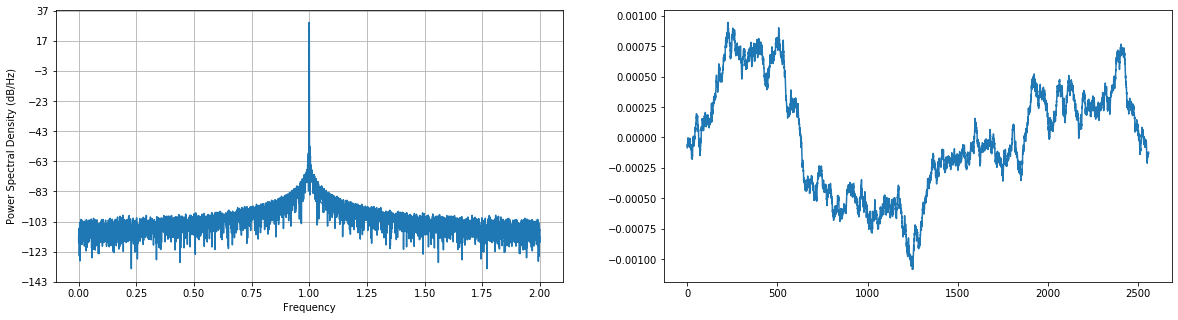

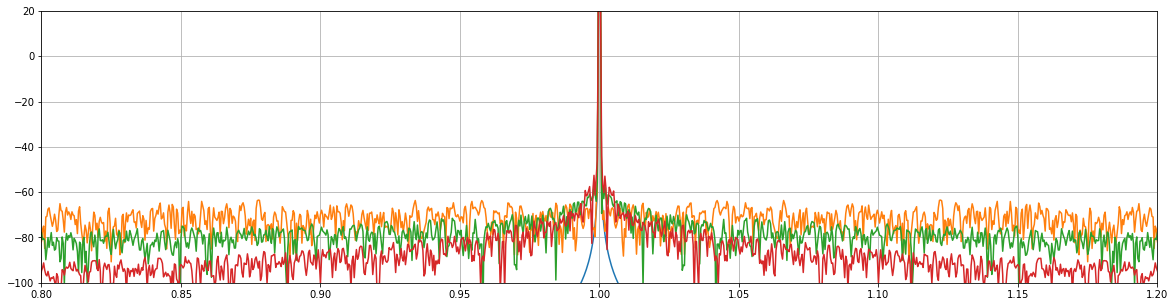

In [9]:
#White frequency noise (alpha=0)
phi_noise = 0.001*noise(N, a=0)
PHASE = 2*pi*f0*t + phi_noise
d = np.cos(PHASE)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
D, f = ax1.psd(d, NFFT=N, Fs=1/dt, pad_to=N);
ax2.plot(t,phi_noise)

fig = plt.figure()
plt.plot(f,10*np.log10(A),f,10*np.log10(B),f,10*np.log10(C),f,10*np.log10(D));
plt.axis([0.8,1.2,-100,20]); plt.grid('on')

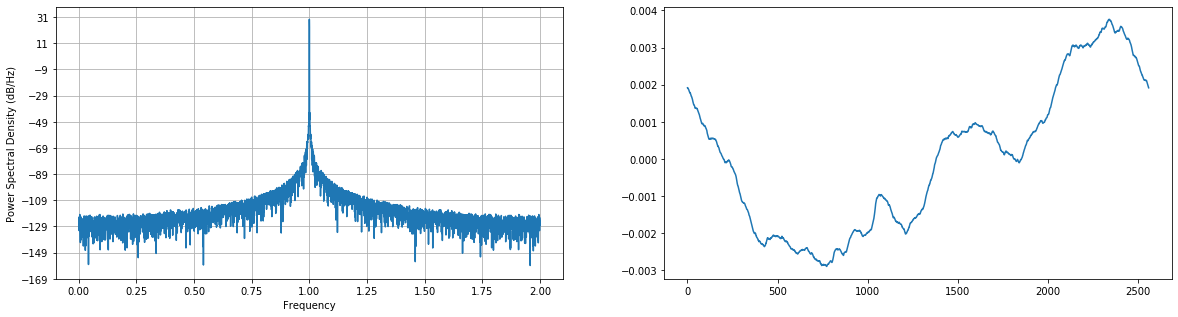

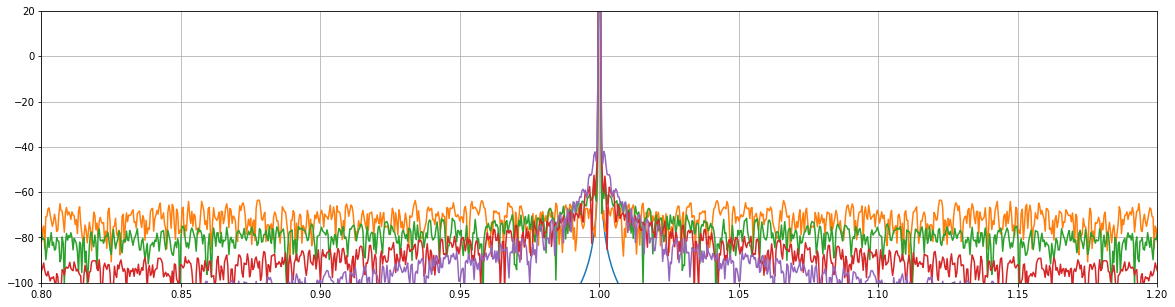

In [10]:
#Flicker FM (alpha=-1)
phi_noise = 0.0001*noise(N, a=-1)
PHASE = 2*pi*f0*t + phi_noise
e = np.cos(PHASE)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
E, f = ax1.psd(e, NFFT=N, Fs=1/dt, pad_to=N);
ax2.plot(t,phi_noise)

fig = plt.figure()
plt.plot(f,10*np.log10(A),f,10*np.log10(B),f,10*np.log10(C),f,10*np.log10(D),f,10*np.log10(E));
plt.axis([0.8,1.2,-100,20]); plt.grid('on')

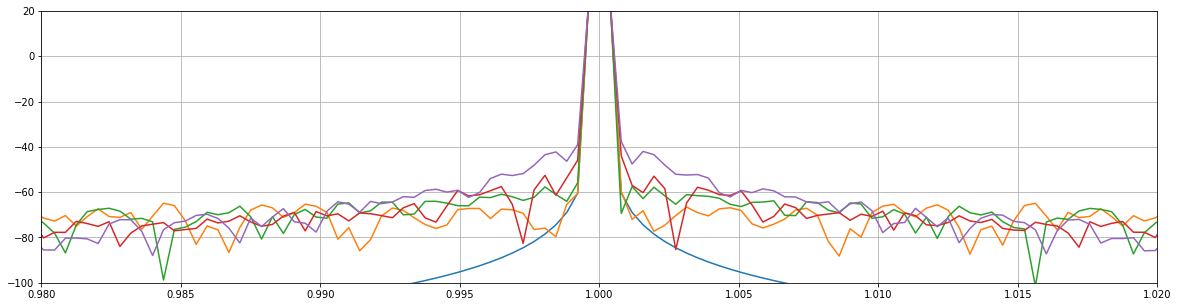

In [11]:
plt.plot(f,10*np.log10(A),f,10*np.log10(B),f,10*np.log10(C),f,10*np.log10(D),f,10*np.log10(E));
plt.axis([0.98,1.02,-100,20]); plt.grid('on')

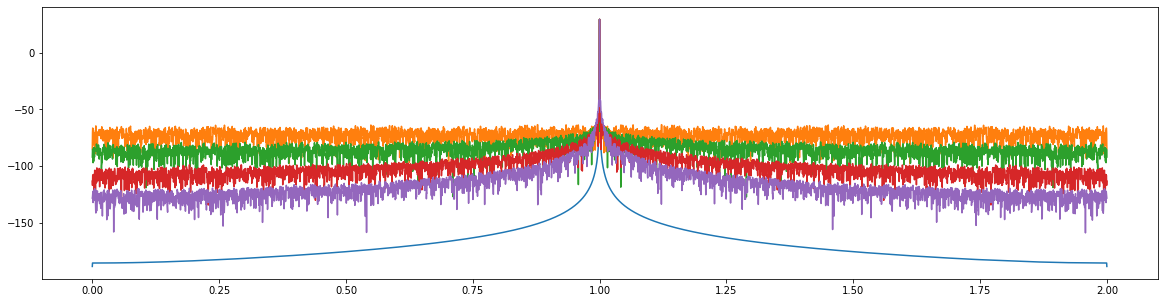

In [12]:
fig = plt.figure()
plt.plot(f,10*np.log10(A),f,10*np.log10(B),f,10*np.log10(C),f,10*np.log10(D),f,10*np.log10(E));

Text(0, 0.5, 'Freq')

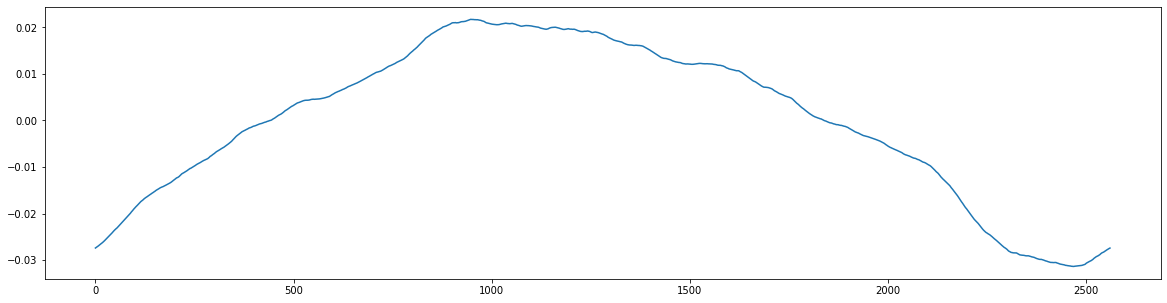

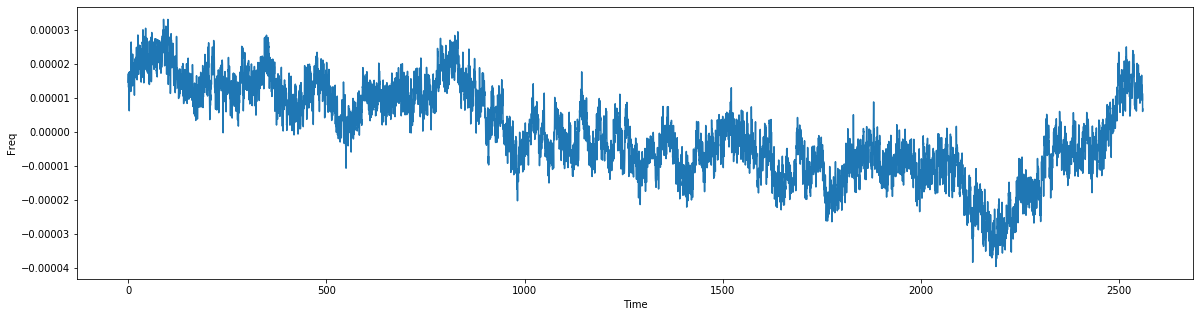

In [33]:
#Fractional phase deviations
phi_noise = 0.0001*noise(N, a=-2) + 0.001*noise(N, a=-1) + 0.001*noise(N, a=0) + 0.001*noise(N, a=1)
x = phi_noise/(2*pi*f0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t,x);

#Fractional phase deviations
y = np.gradient(x)
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.plot(t,y);
plt.xlabel('Time')
plt.ylabel('Frequency Varaitions')

Text(0.5, 0, 'Log(tau) - Integration time')

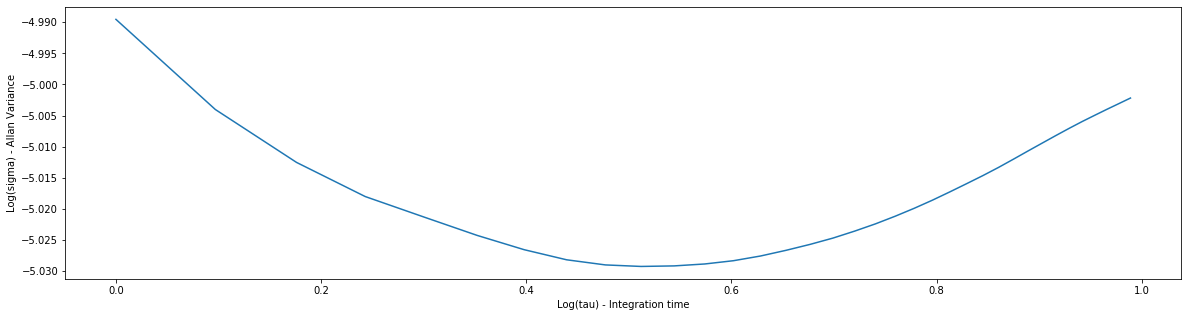

In [32]:
#Allan deviation
tau = np.arange(4*dt,10,dt)
avary = np.zeros_like(tau)
for k in range(tau.size):
    avary[k] = avar(x, dt, tau[k])

# slope = 0.5*(np.log10(avary[1])-np.log10(avary[0]))/(np.log10(tau[1])-np.log10(tau[0]))
# print('avary slope = ' + str(slope))
    
fig = plt.figure()
plt.plot(np.log10(tau),0.5*np.log10(avary));
plt.ylabel('Log(sigma) - Allan Variance')
plt.xlabel('Log(tau) - Integration time')